In [78]:
%matplotlib notebook

In [1]:
import sys
sys.path.append("/scratch/tc427/lucy/consensus/code")

In [ ]:
import numpy as np
import consensus

In [11]:
prog = "mcfold"
cut = 5
seq_cl1 = "GGAAGAGGAAAGAAGTGCAGAGCCAGTATTCGGGTACATCCAGACGTGCCTCTCTTTTGGATTTCTTGTGCTCGCGAGGCAATCA"

In [64]:
def cutmap(seq, cut, prog="mcfold"):
    cpred = consensus.Consensus(prog)
    # store the energy of the lowest strcture for each cut
    cutmap=np.zeros((cut, cut), dtype=float)
    # store the 2D structure in here, in dot-bracket format
    cutstruct=np.zeros((cut, cut), dtype="U"+str(len(seq)))
    for i in range(cut):
        for ji in range(cut):
            j = len(seq)-ji
            #print(seq[i:j])
            p = cpred.run(seq[i:j], outdir=None, rmdir=True)
            #print(p)
            #print((-i,-ji), end=", ")
            cutmap[i,ji] = p.ix[0,1]
            print(cutmap[i,ji], end=", ")
            cutstruct[i,ji] = p.ix[0,0]
        print(" ")
    return cutmap, cutstruct

In [ ]:
cl1__mfold_cut = cutmap(seq_cl1, 5, 'mfold')

In [65]:
cl1_cut30 = cutmap(seq_cl1, 30)

-78.01, -76.19, -72.66, -73.29, -70.34, -67.67, -67.67, -67.67, -66.17, -64.84, -64.64, -64.25, -64.25, -64.25, -62.74, -59.9, -59.9, -58.93, -58.93, -58.93, -58.93, -55.56, -53.63, -53.32, -53.32, -53.32, -53.32, -53.32, -51.52, -50.29,  
-76.83, -74.4, -70.86, -69.75, -68.11, -67.67, -67.67, -67.67, -64.98, -64.64, -64.64, -62.73, -62.18, -62.18, -62.18, -59.79, -58.77, -58.52, -57.5, -55.56, -55.56, -55.56, -53.63, -51.52, -51.52, -51.52, -51.52, -51.52, -51.52, -49.59,  
-74.87, -72.47, -69.73, -69.73, -67.75, -67.52, -67.52, -65.74, -64.98, -63.15, -62.89, -62.73, -61.54, -58.89, -58.89, -58.89, -58.77, -57.5, -57.5, -54.89, -53.63, -53.63, -53.63, -51.02, -49.59, -49.59, -49.59, -49.59, -49.59, -49.59,  
-72.26, -70.23, -67.57, -67.57, -66.91, -66.41, -65.33, -64.61, -62.81, -62.73, -62.73, -62.73, -61.54, -58.49, -57.89, -57.89, -57.89, -56.44, -55.49, -54.89, -52.31, -52.07, -51.02, -51.02, -49.48, -48.16, -48.16, -48.16, -46.98, -46.98,  
-70.33, -69.36, -67.57, -67.57, -66.07

<IPython.core.display.Javascript object>


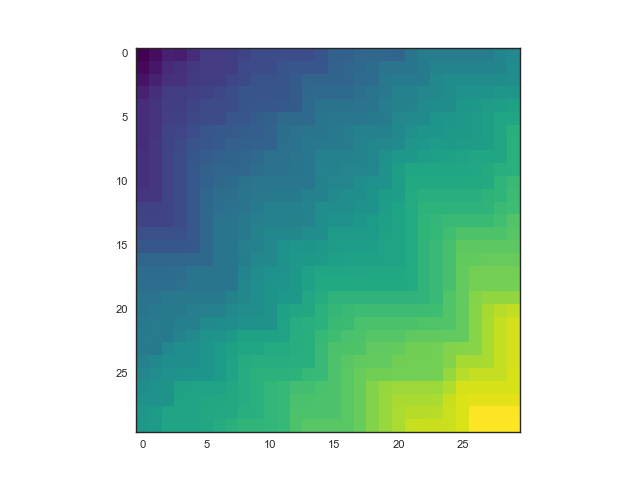

In [84]:
with sns.axes_style("white"):
    fig1, ax1 = plt.subplots()
    ax1.imshow(cl1_cut30[0], cmap='viridis', interpolation='none')

In [86]:
# create a matrix of the sequence lengths, to be used as a normalisation factor
l = np.zeros(cl1_cut30[0].shape)
for i in range(l.shape[0]):
    for j in range(l.shape[1]):
        l[i,j] = len(cl1_cut30[1][i,j])

<IPython.core.display.Javascript object>


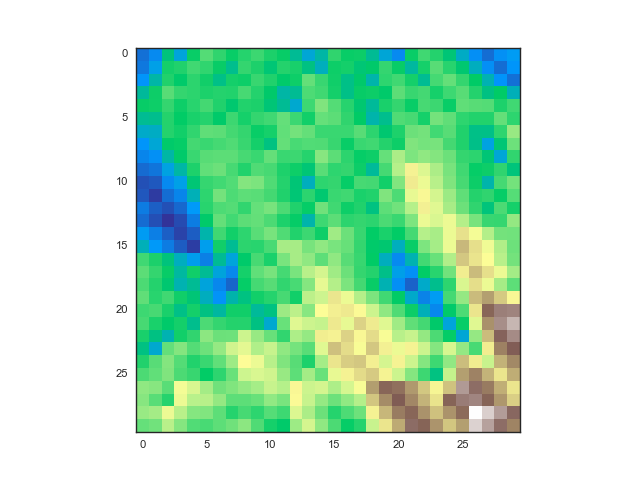

In [87]:
with sns.axes_style("white"):
    fig2, ax2 = plt.subplots()
    ax2.imshow(cl1_cut30[0]/l, cmap='terrain', interpolation='none')